In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
data = pd.read_csv('MLproj2_rolling_stones_spotify.csv')
data.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [37]:
data.describe()

,Unnamed: 0,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,804.500000,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
std,464.911282,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920
min,0.000000,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,402.250000,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,804.500000,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,1206.750000,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,1609.000000,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000


In [38]:
missing_values = data.isnull().sum()
missing_values

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [39]:
data.duplicated().sum()

np.int64(0)

In [40]:
print(f"{data['id'].nunique()==len(data)}")
print(f"{data['uri'].nunique() == len(data)}")

True
True


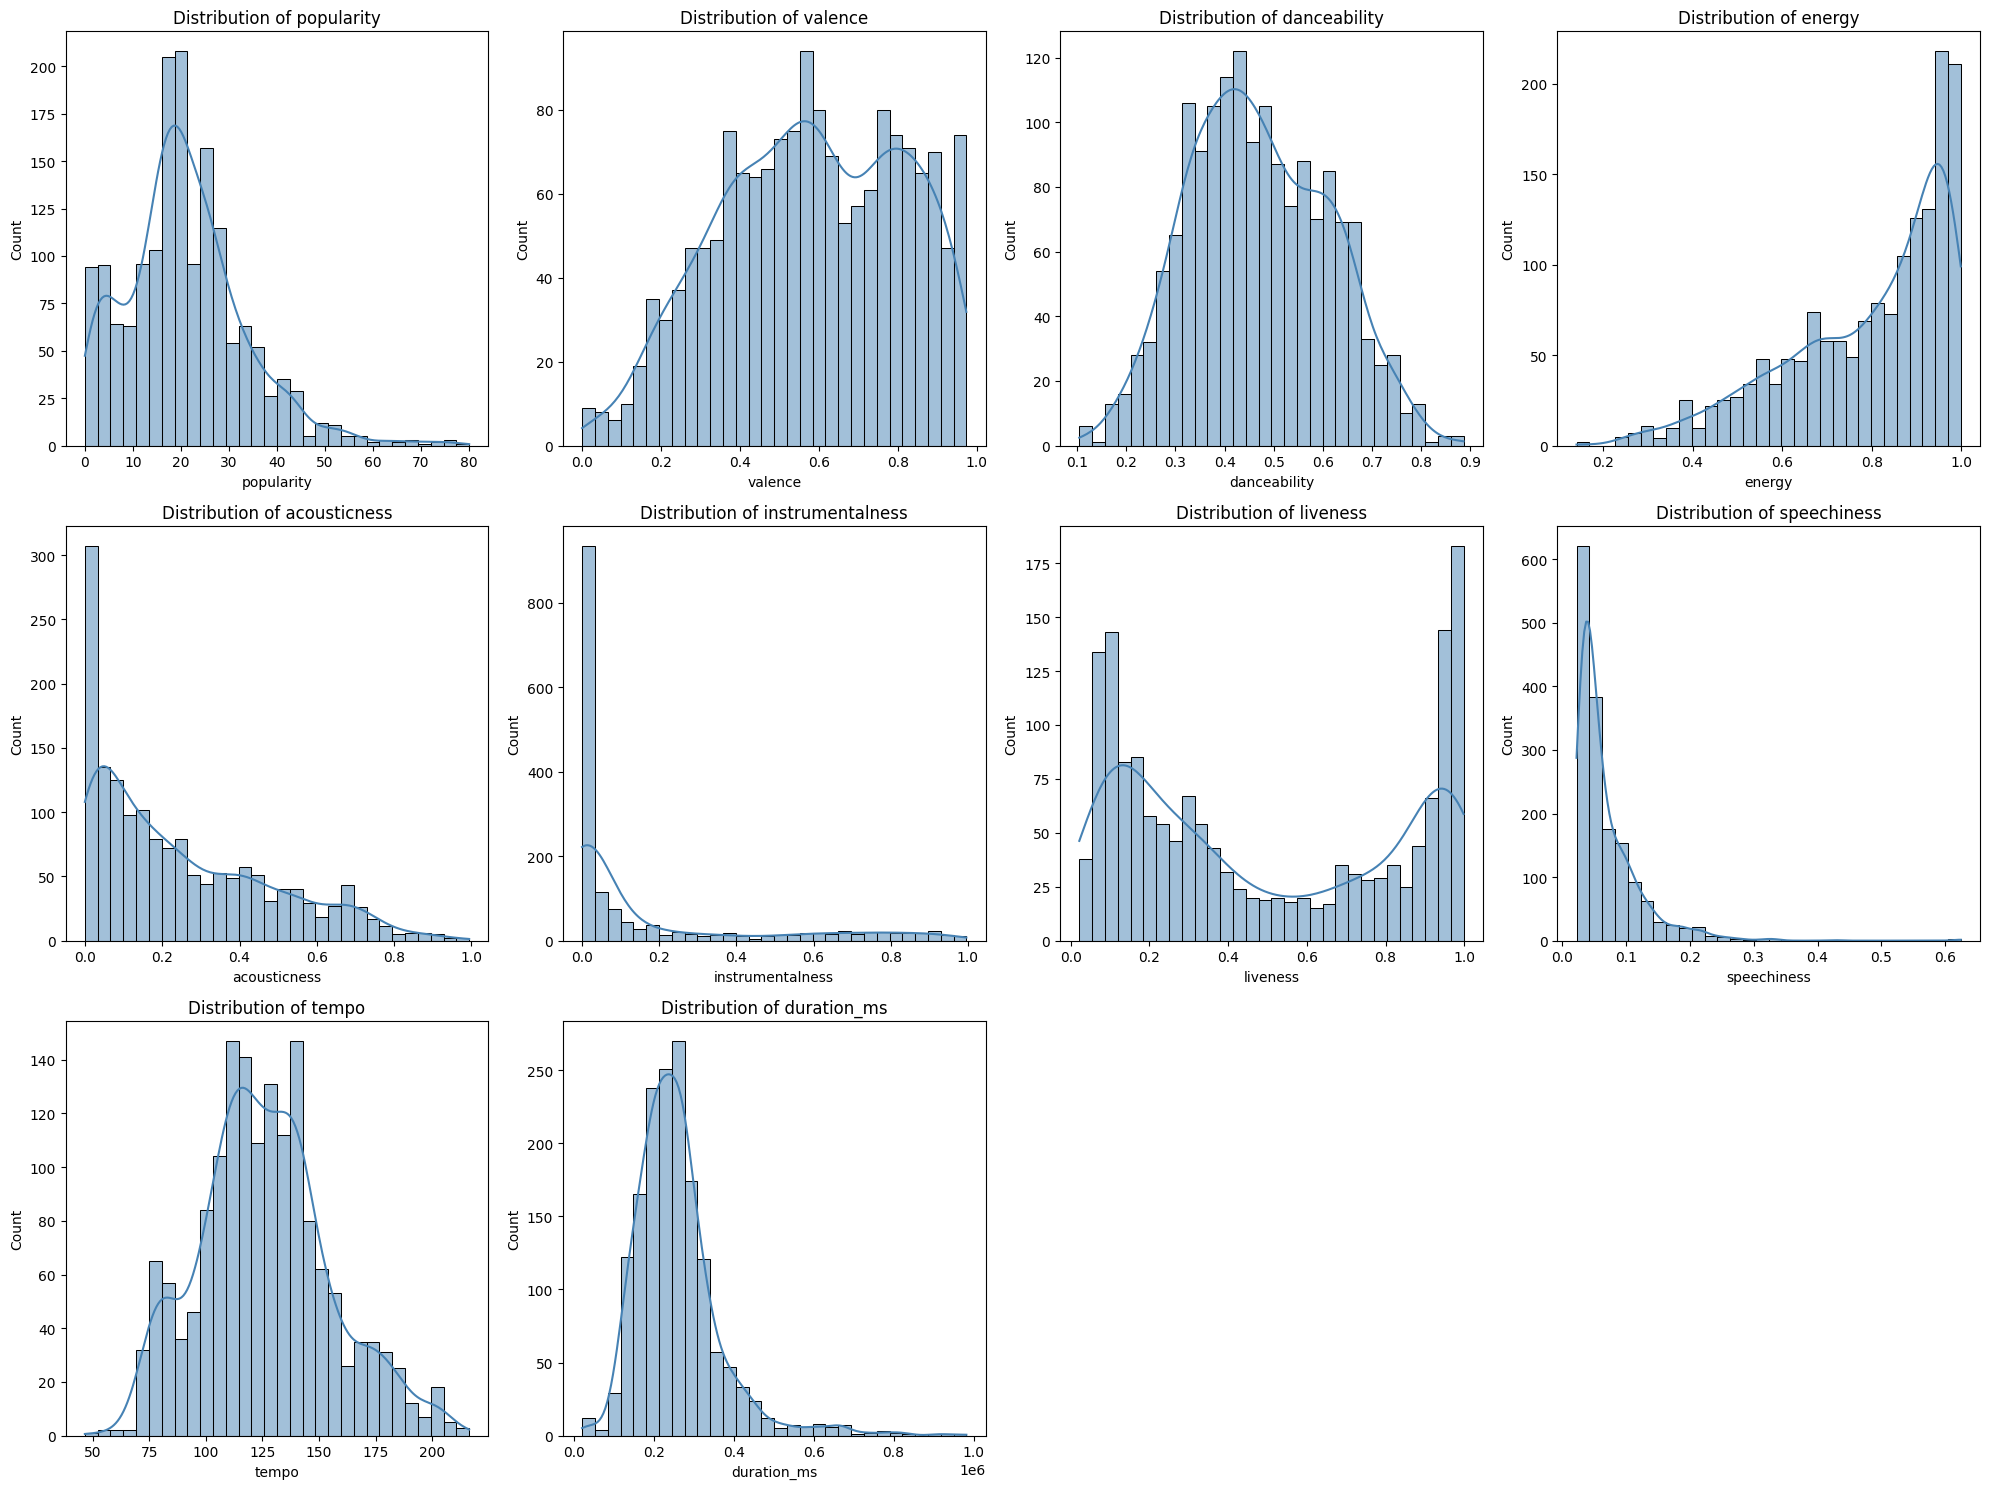

In [41]:
#continuous features for assessment
features = [
    'popularity', 'valence', 'danceability', 'energy', 'acousticness',
    'instrumentalness', 'liveness', 'speechiness', 'tempo', 'duration_ms'
]

#plot histograms with kde overlay
plt.figure(figsize=(20, 15))
for i,feature in enumerate(features):
    plt.subplot(3,4,i+1)
    sns.histplot(data[feature], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

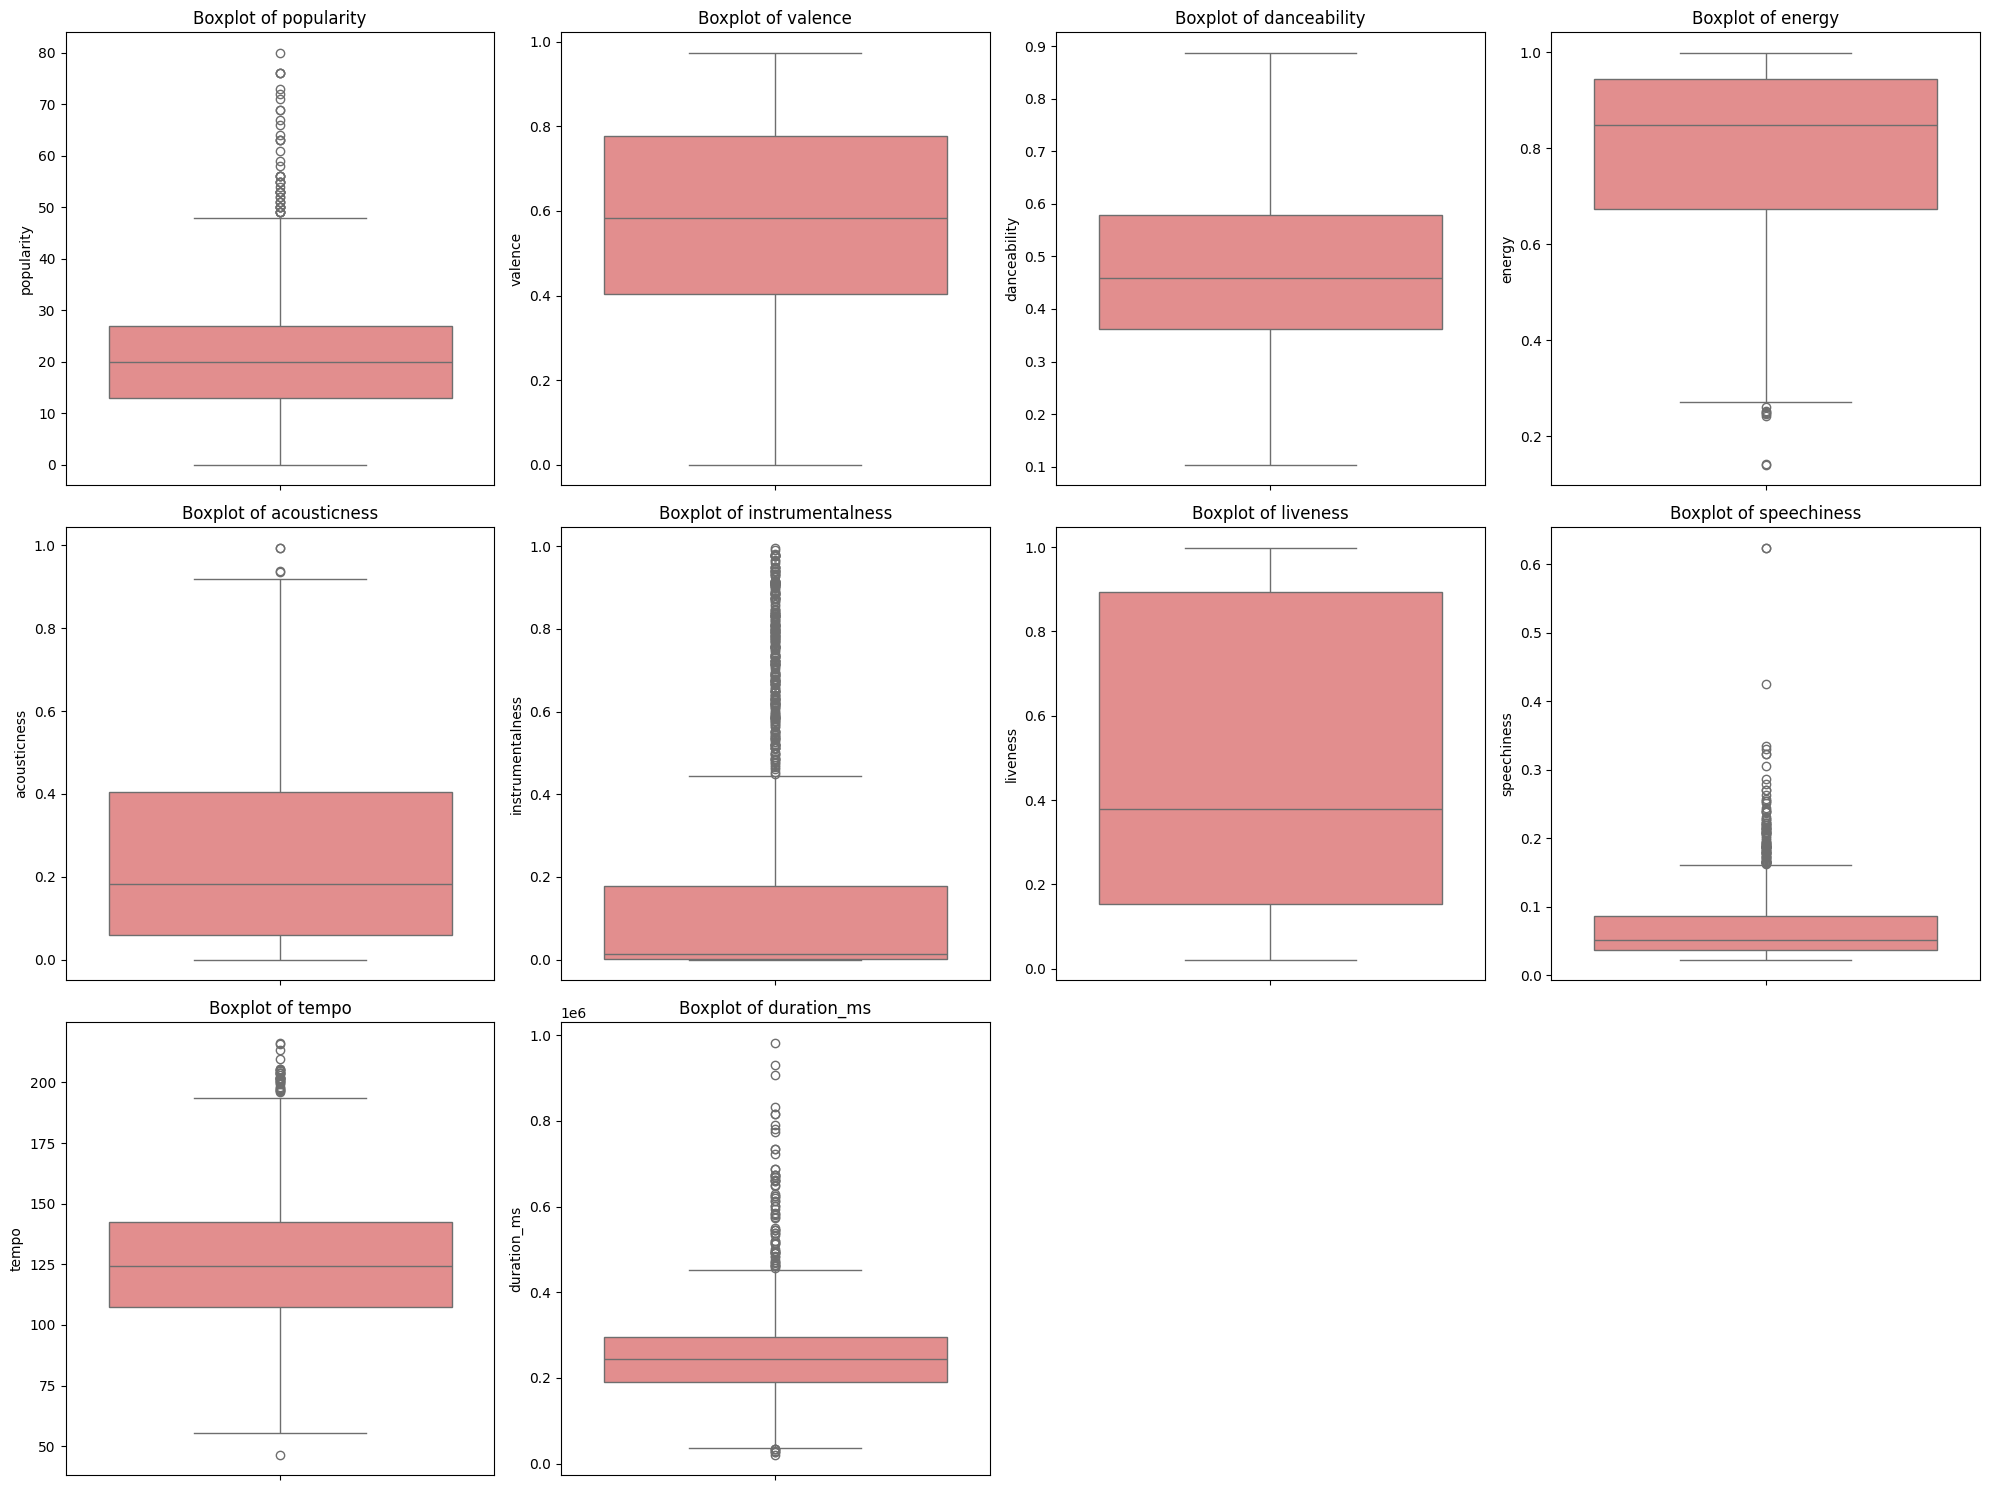

In [42]:
#boxplots
plt.figure(figsize=(20, 15))
for i,feature in enumerate(features):
    plt.subplot(3,4,i+1)
    sns.boxplot(data[feature], color='lightcoral')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [43]:
#converting the duration from milliseconds to minutes
data['duration_ms'] = data['duration_ms'] / 60000
data['duration_ms'].describe() 

count    1610.000000
mean        4.295608
std         1.805558
min         0.350000
25%         3.176883
50%         4.051550
75%         4.921996
max        16.364433
Name: duration_ms, dtype: float64

In [44]:
#cleaning outliers in the duration
data = data[data['duration_ms'] > 0.5]
data = data[data['duration_ms'] < 10]
data['duration_ms'].describe()

count    1573.000000
mean        4.147431
std         1.425178
min         0.549100
25%         3.161550
50%         4.006000
75%         4.875550
max         9.897550
Name: duration_ms, dtype: float64

In [45]:
data['tempo'].describe()

count    1573.000000
mean      125.966641
std        29.343169
min        46.525000
25%       107.307000
50%       124.123000
75%       142.269000
max       216.304000
Name: tempo, dtype: float64

In [46]:
#cleaning tempo column
data = data[data['tempo'] > 60]
data = data[data['tempo'] < 190]
data['tempo'].describe()

count    1527.000000
mean      124.018302
std        26.761732
min        63.103000
25%       106.672000
50%       122.756000
75%       140.971500
max       189.824000
Name: tempo, dtype: float64

In [47]:
#delete instrumentalness column since it has too many outliers, and too many zeros
data = data.drop(columns=['instrumentalness'])

In [48]:
#speechiness column
data['speechiness'].describe()

count    1527.000000
mean        0.068488
std         0.051901
min         0.023200
25%         0.036050
50%         0.050200
75%         0.084300
max         0.624000
Name: speechiness, dtype: float64

In [49]:
#dropping the speechiness column since it has too many zeros
data = data.drop(columns=['speechiness'])

In [50]:
data['duration_min'] = data['duration_ms'] / 60000

# Drop original 'duration_ms' now that we have duration in minutes
data = data.drop(columns='duration_ms')

In [51]:
print(data.shape)
print(data.head())

(1527, 16)
   Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceabili

In [52]:
#Drop columns that are identifiers or not useful for clustering
data = data.drop(columns=['id', 'uri']) 

# EDA

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1527 entries, 0 to 1609
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1527 non-null   int64  
 1   name          1527 non-null   object 
 2   album         1527 non-null   object 
 3   release_date  1527 non-null   object 
 4   track_number  1527 non-null   int64  
 5   acousticness  1527 non-null   float64
 6   danceability  1527 non-null   float64
 7   energy        1527 non-null   float64
 8   liveness      1527 non-null   float64
 9   loudness      1527 non-null   float64
 10  tempo         1527 non-null   float64
 11  valence       1527 non-null   float64
 12  popularity    1527 non-null   int64  
 13  duration_min  1527 non-null   float64
dtypes: float64(8), int64(3), object(3)
memory usage: 178.9+ KB


In [54]:
data.describe()

,Unnamed: 0,track_number,acousticness,danceability,energy,liveness,loudness,tempo,valence,popularity,duration_min
count,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000
mean,806.859201,8.654879,0.251811,0.476942,0.792435,0.485014,-6.935435,124.018302,0.587858,20.956123,0.000069
std,466.290290,6.627869,0.228825,0.139265,0.179344,0.348599,2.930728,26.761732,0.231531,12.503107,0.000024
min,0.000000,1.000000,0.000009,0.104000,0.141000,0.021900,-24.408000,63.103000,0.018700,0.000000,0.000009
25%,397.500000,4.000000,0.056350,0.374000,0.672500,0.152000,-8.997000,106.672000,0.409500,13.000000,0.000053
50%,815.000000,7.000000,0.184000,0.467000,0.844000,0.363000,-6.517000,122.756000,0.592000,20.000000,0.000067
75%,1210.500000,11.000000,0.406500,0.584000,0.946000,0.891500,-4.599000,140.971500,0.783000,27.000000,0.000081
max,1609.000000,47.000000,0.994000,0.887000,0.997000,0.998000,-1.014000,189.824000,0.974000,80.000000,0.000165


Number of unique albums: 90
Album counts: album
Voodoo Lounge Uncut (Live)                                   54
Honk (Deluxe)                                                47
Tattoo You (Super Deluxe)                                    45
Some Girls (Deluxe Version)                                  42
Live Licks                                                   41
                                                             ..
Let It Bleed (50th Anniversary Edition / Remastered 2019)     9
12 X 5                                                        9
Black And Blue                                                8
Black And Blue (Remastered 2009)                              8
Jamming With Edward                                           5
Name: count, Length: 90, dtype: int64


C:\Users\Varun\AppData\Local\Temp\ipykernel_2328\364366681.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=album_counts.index,y=album_counts.values,palette='viridis')


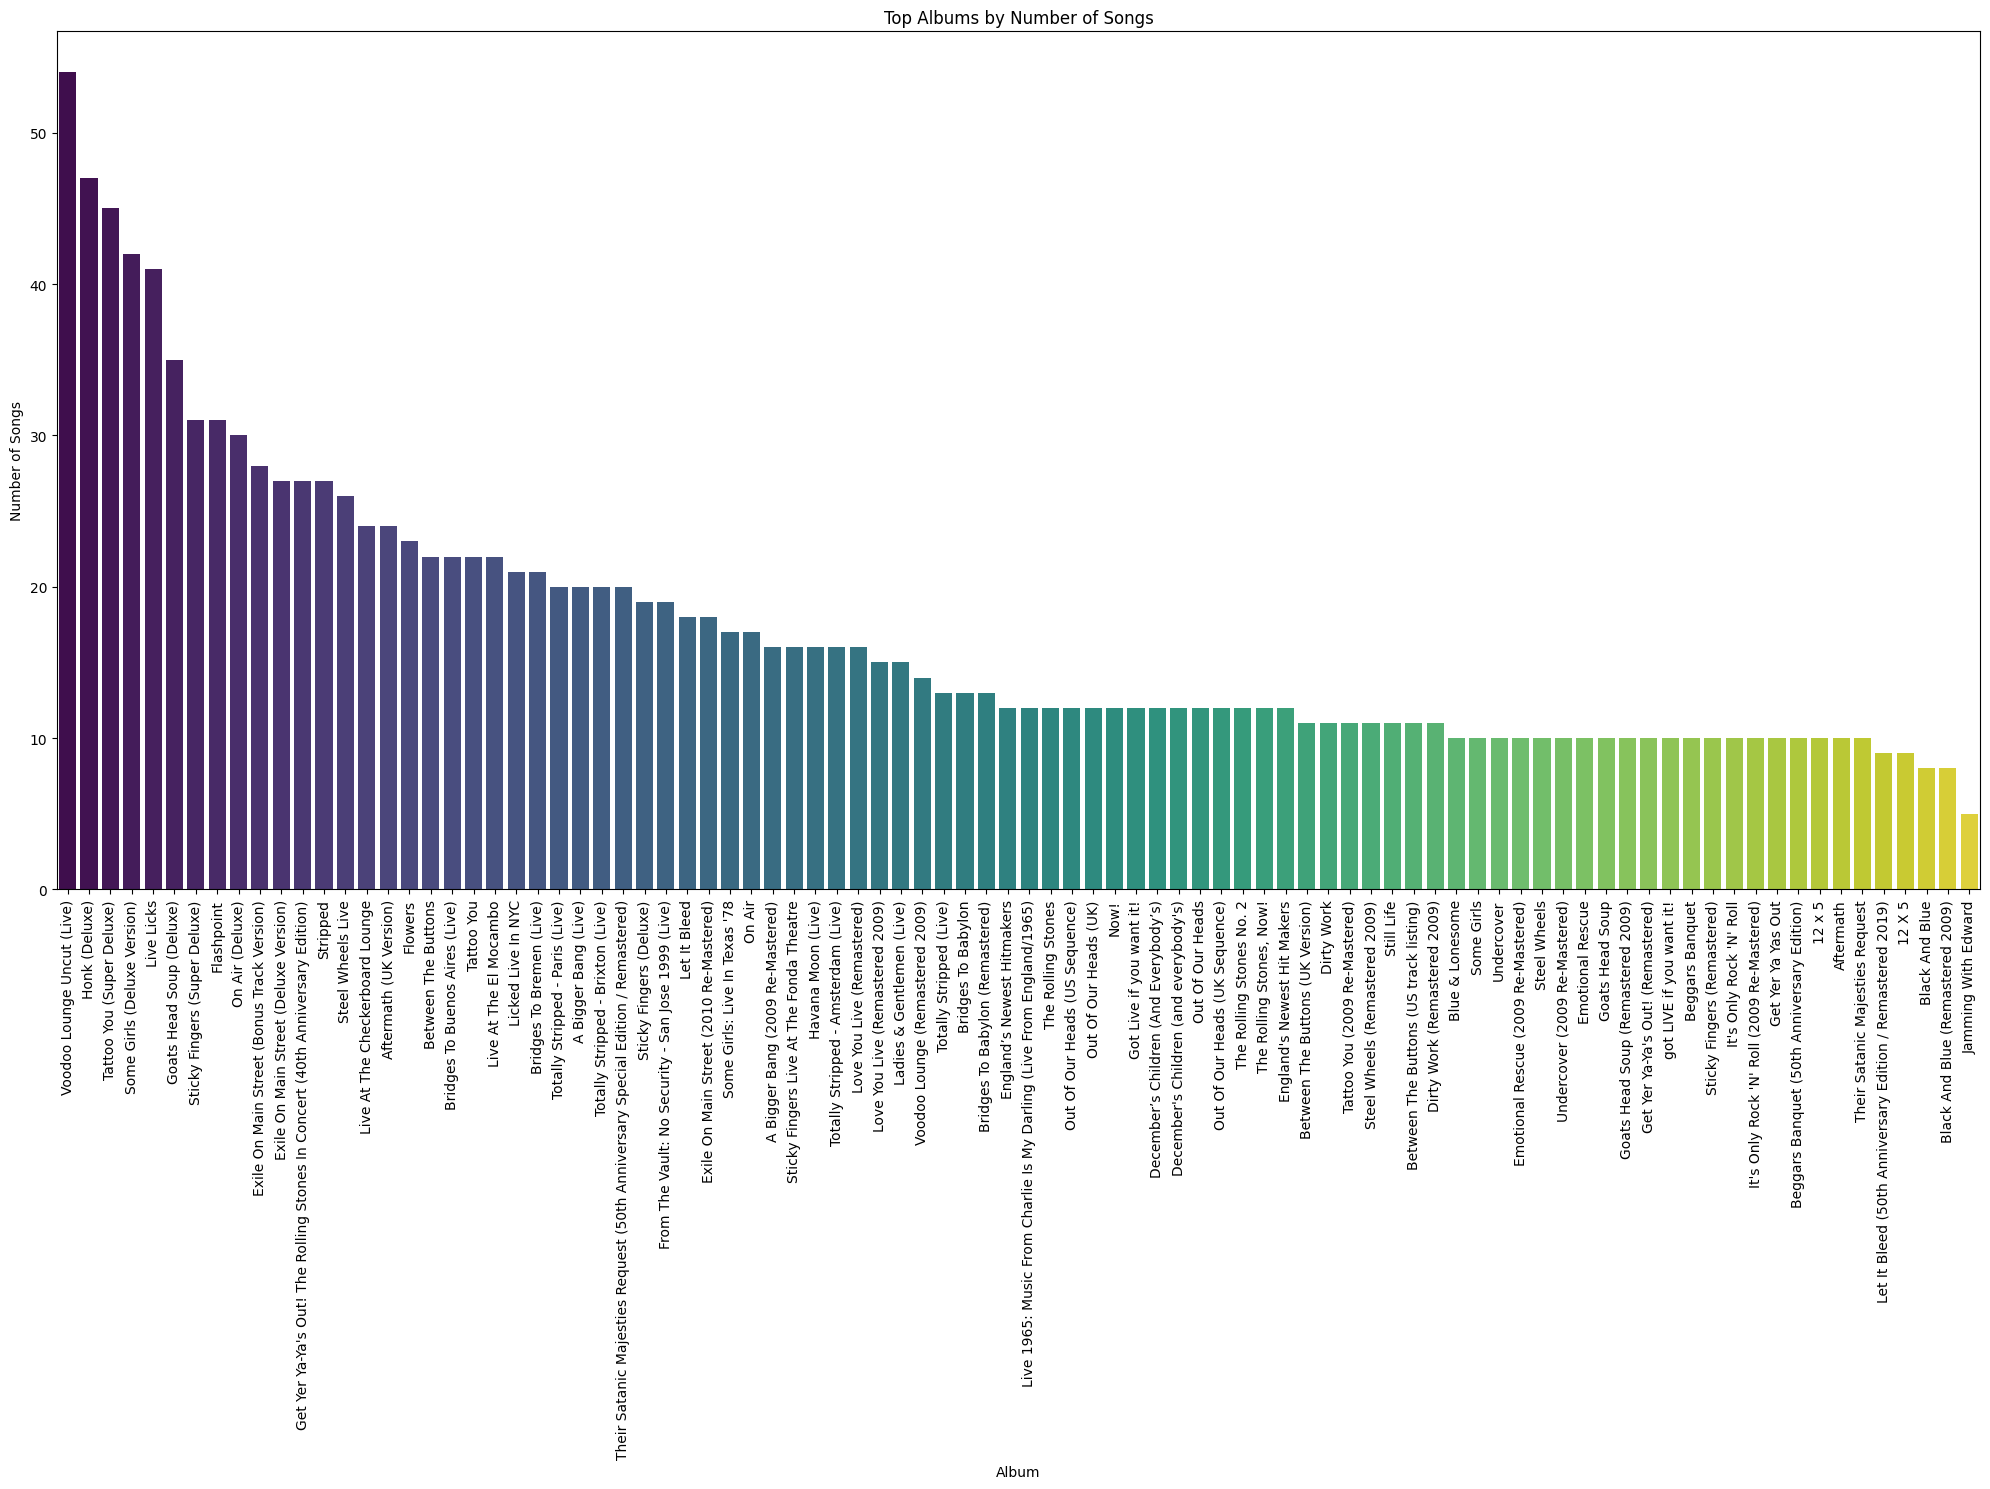

In [55]:
print(f"Number of unique albums: {data['album'].nunique()}")
print(f"Album counts: {data['album'].value_counts()}")
album_counts=data['album'].value_counts()

# Barplot of top albums by number of songs
plt.figure(figsize=(20,15))
sns.barplot(x=album_counts.index,y=album_counts.values,palette='viridis')
plt.xticks(rotation=90)
plt.title("Top Albums by Number of Songs")
plt.ylabel("Number of Songs")
plt.xlabel("Album")
plt.tight_layout()
plt.show()

C:\Users\Varun\AppData\Local\Temp\ipykernel_2328\3564167463.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=album_popularity.index, y=album_popularity.values, palette="rocket")


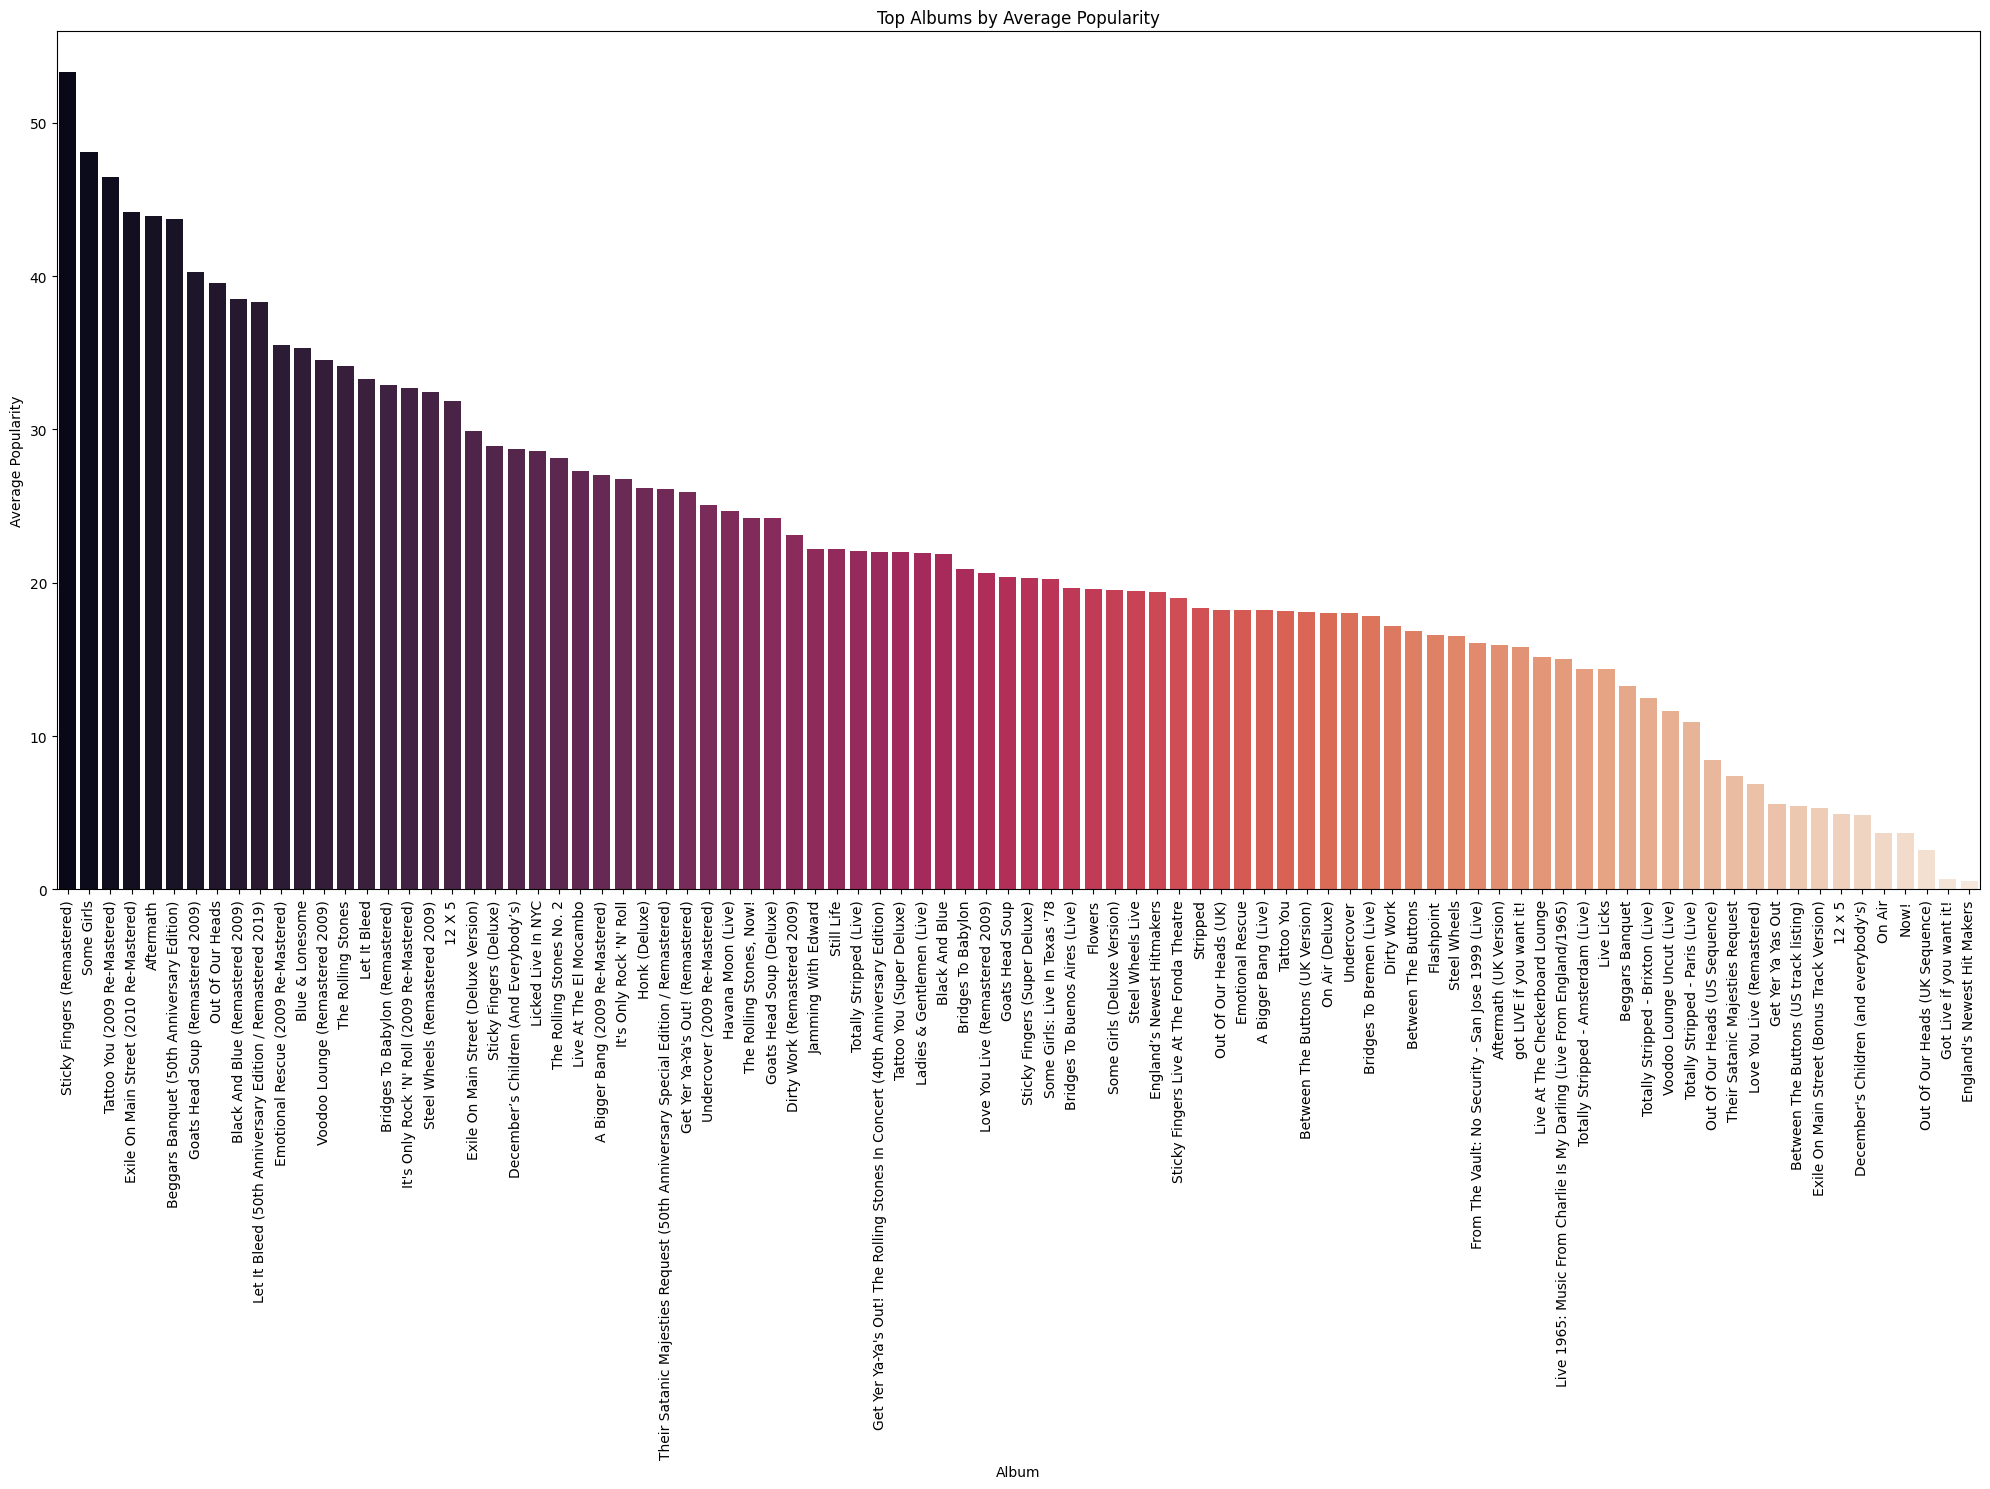

In [56]:
# Group by album, compute average popularity
album_popularity = data.groupby('album')['popularity'].mean().sort_values(ascending=False)

# Visualize top 10
plt.figure(figsize=(20,15))
sns.barplot(x=album_popularity.index, y=album_popularity.values, palette="rocket")
plt.xticks(rotation=90)
plt.title("Top Albums by Average Popularity")
plt.ylabel("Average Popularity")
plt.xlabel("Album")
plt.tight_layout()
plt.show()

              Unnamed: 0  track_number  acousticness  danceability    energy  \
Unnamed: 0      1.000000     -0.330027      0.108949      0.353285 -0.415087   
track_number   -0.330027      1.000000     -0.025377     -0.130299  0.088899   
acousticness    0.108949     -0.025377      1.000000      0.068936 -0.378117   
danceability    0.353285     -0.130299      0.068936      1.000000 -0.311754   
energy         -0.415087      0.088899     -0.378117     -0.311754  1.000000   
liveness       -0.487156      0.190237     -0.124391     -0.525415  0.506764   
loudness       -0.463498      0.087034     -0.245530     -0.279544  0.704597   
tempo          -0.038085     -0.012632     -0.178800     -0.273739  0.249267   
valence         0.290259     -0.116008     -0.150705      0.546596  0.043511   
popularity      0.016776     -0.154716      0.110957      0.136463 -0.064079   
duration_min   -0.356362      0.155971      0.076236     -0.242354  0.151779   

              liveness  loudness     te

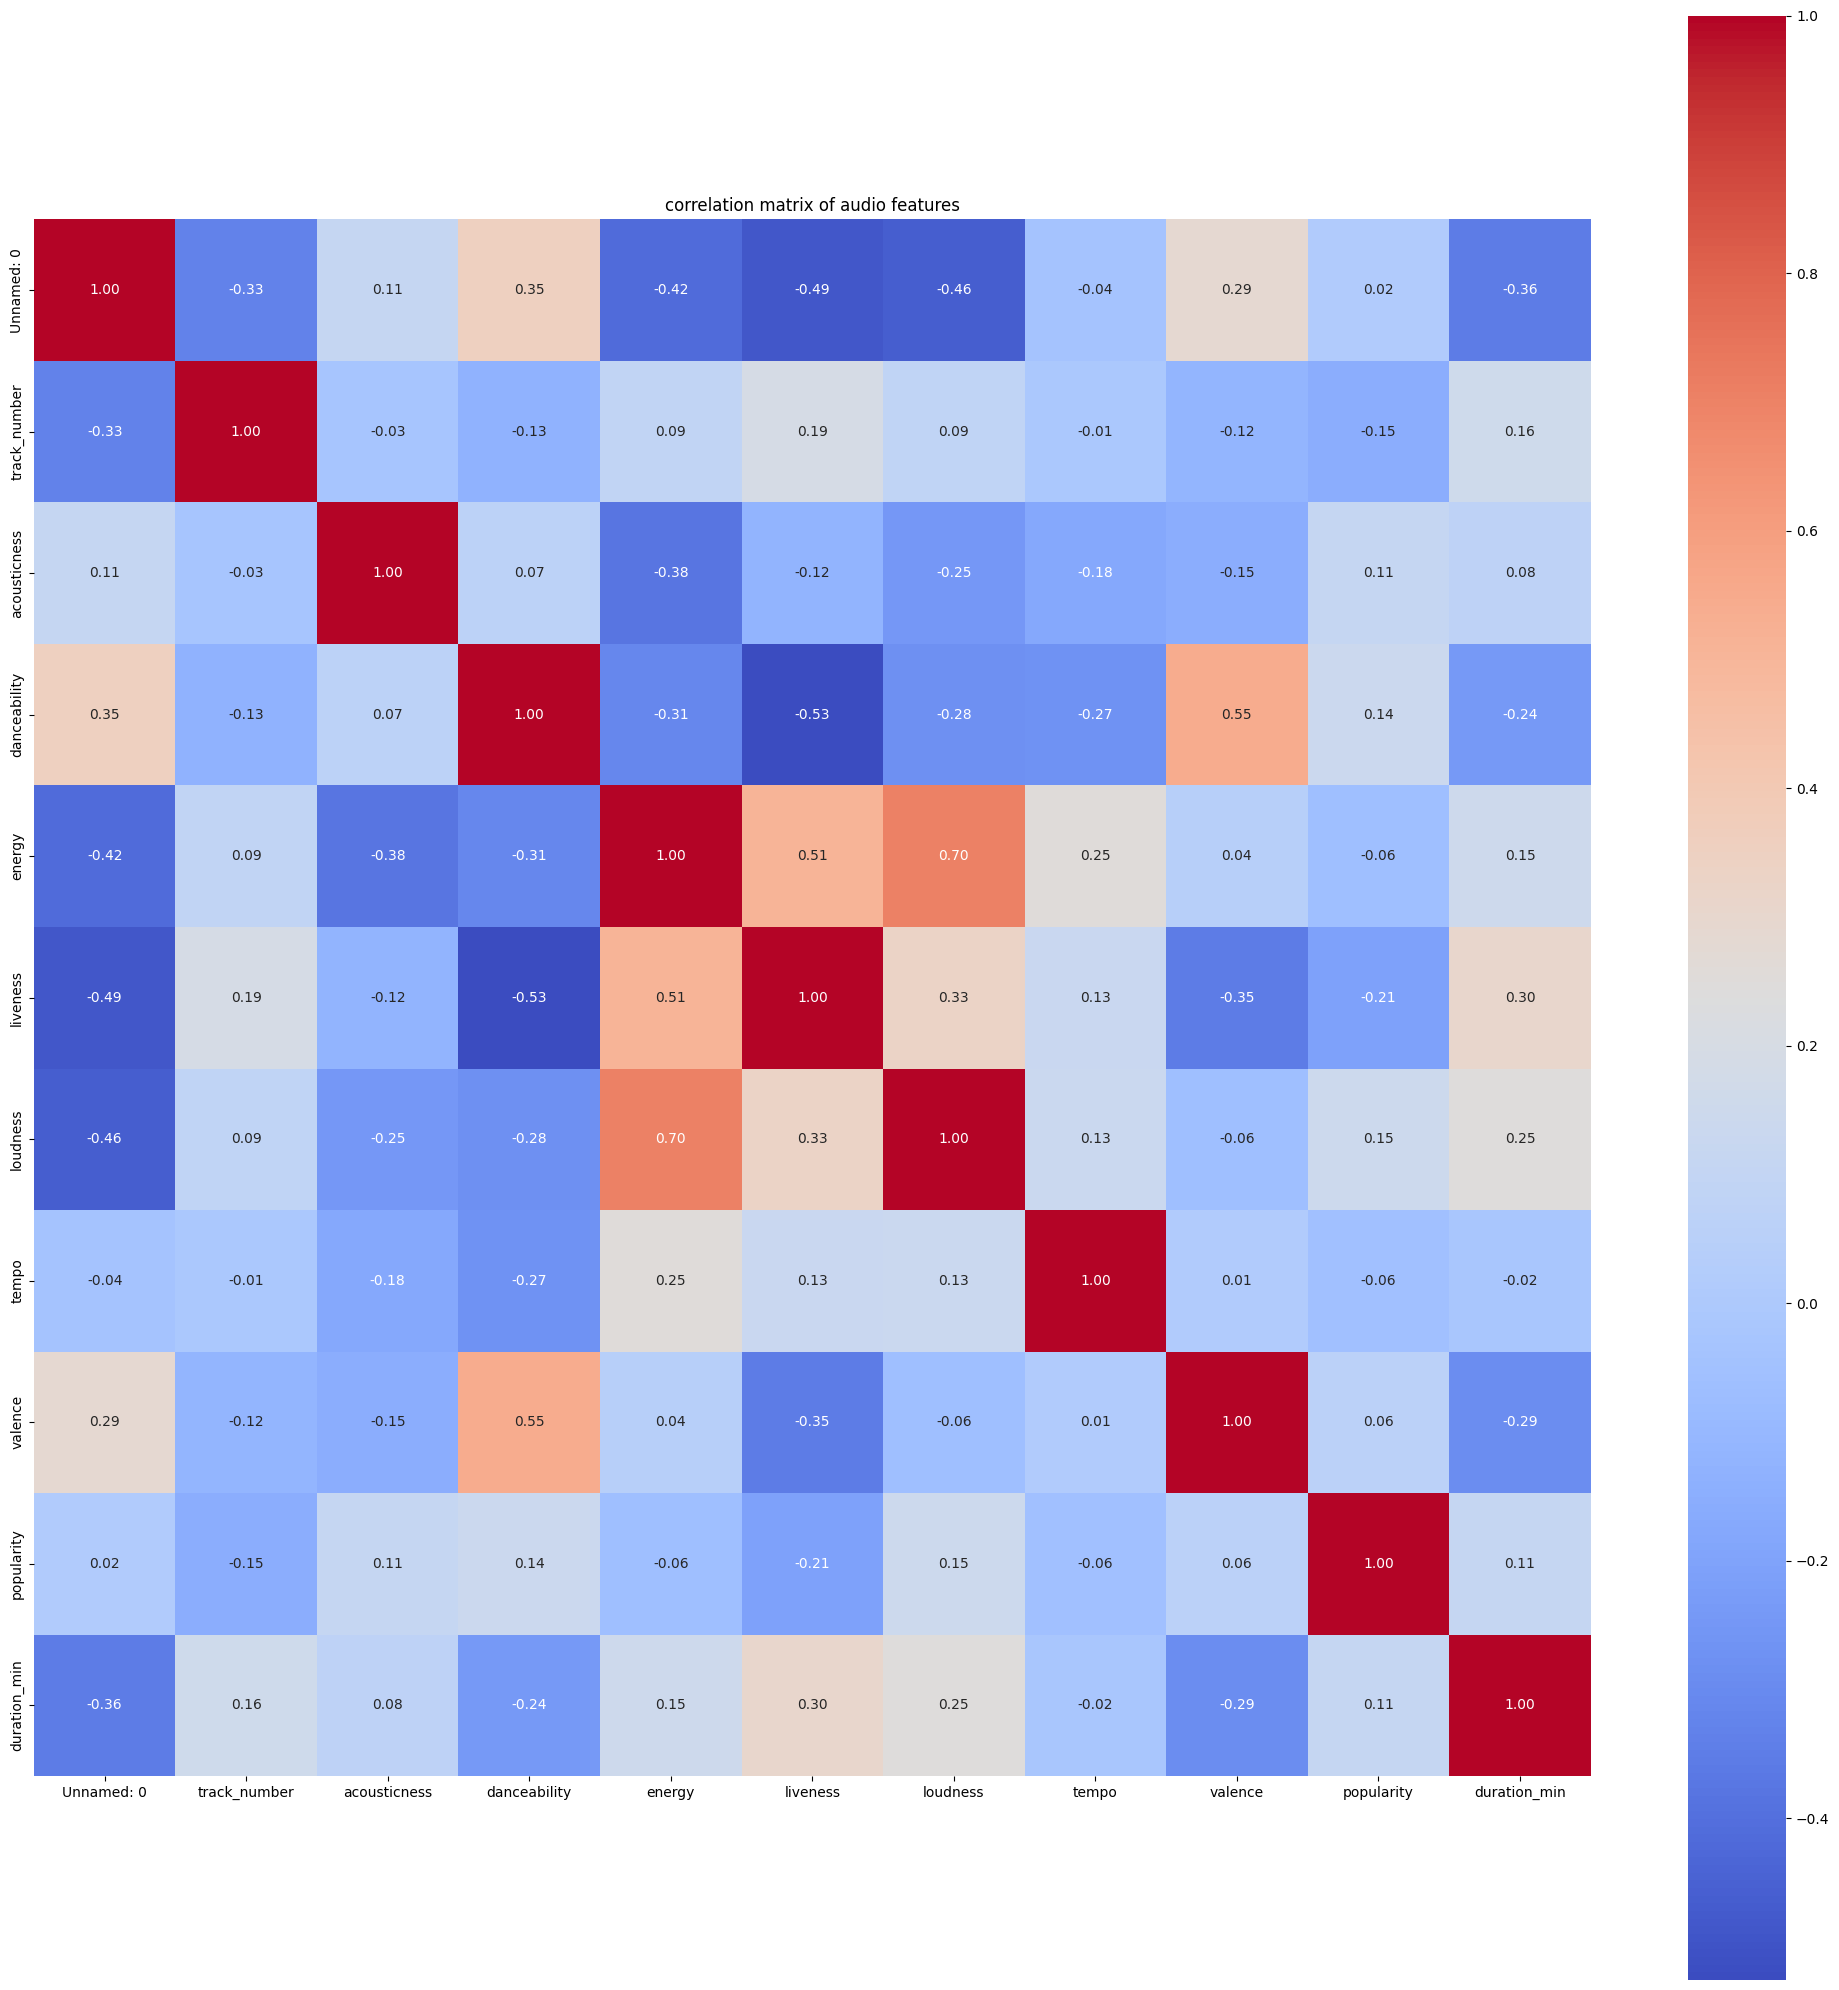

In [57]:
# correlation matrix
numeric_cols=data.select_dtypes(include=['float64','int64'])
correlation_matrix = numeric_cols.corr()

print(correlation_matrix)

plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("correlation matrix of audio features")
plt.tight_layout()
plt.show()

| Feature Pair                | Correlation | Interpretation                                            |  Action                    |
| --------------------------- | ----------- | --------------------------------------------------------- | ----------------------------------- |
| `energy` ↔ `loudness`       | +0.70       | Louder songs tend to be more energetic                    | Drop one for clustering (redundant) |
| `danceability` ↔ `valence`  | +0.55       | Happy songs tend to be more danceable                     | Keep both (capture emotional tone)  |
| `liveness` ↔ `energy`       | +0.51       | Live tracks are often more energetic                      | Keep both                           |
| `liveness` ↔ `loudness`     | +0.33       | Live recordings may have variable dynamics or crowd noise | Keep both                           |
| `duration_min` ↔ `loudness` | +0.25       | Slight correlation; longer tracks may be louder           | Weak, no action needed              |
| `tempo` ↔ `energy`          | +0.25       | Faster songs may feel more energetic                      | Weak, no action needed              |

| Feature Pair                | Correlation | Interpretation                                | Action |
| --------------------------- | ----------- | --------------------------------------------- | ---------------- |
| `danceability` ↔ `liveness` | -0.53       | Live tracks tend to be less danceable         | Keep both        |
| `energy` ↔ `acousticness`   | -0.38       | Acoustic songs are typically less energetic   | Keep both        |
| `valence` ↔ `liveness`      | -0.35       | Live recordings may feel less joyful          | Keep both        |
| `valence` ↔ `duration_min`  | -0.29       | Longer tracks may be more emotionally complex | Keep both        |
| `danceability` ↔ `tempo`    | -0.27       | Some faster songs may not be danceable        | Keep both        |
| `loudness` ↔ `acousticness` | -0.25       | Acoustic tracks are usually quieter           | Keep both        |

| Feature            | Correlation to Popularity | Interpretation                                   |  Action       |
| ------------------ | ------------------------- | ------------------------------------------------ | ---------------------- |
| `popularity` ↔ all | < ±0.15                   | Popularity not strongly linked to audio features | Keep for EDA only      |
| `track_number`     | Weak/None                 | Album sequencing is irrelevant to audio traits   | Drop before clustering |
| `Unnamed: 0`       | N/A                       | Likely just an index column                      | Drop                   |

| Column                 | Action                | Reason                                   |
| ---------------------- | --------------------- | ---------------------------------------- |
| `Unnamed: 0`           | Drop                  | Index column with no analytical value    |
| `track_number`         | Drop                  | Doesn’t describe the song itself         |
| `popularity`           | Drop (for clustering) | Target variable, not a song feature      |
| `energy` or `loudness` | Drop one              | Highly correlated; redundant information |


CLUSTERING

In [58]:
features = data.drop(columns=['Unnamed: 0', 'track_number', 'popularity', 'loudness'])

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features.select_dtypes(include=['float64','int64']))

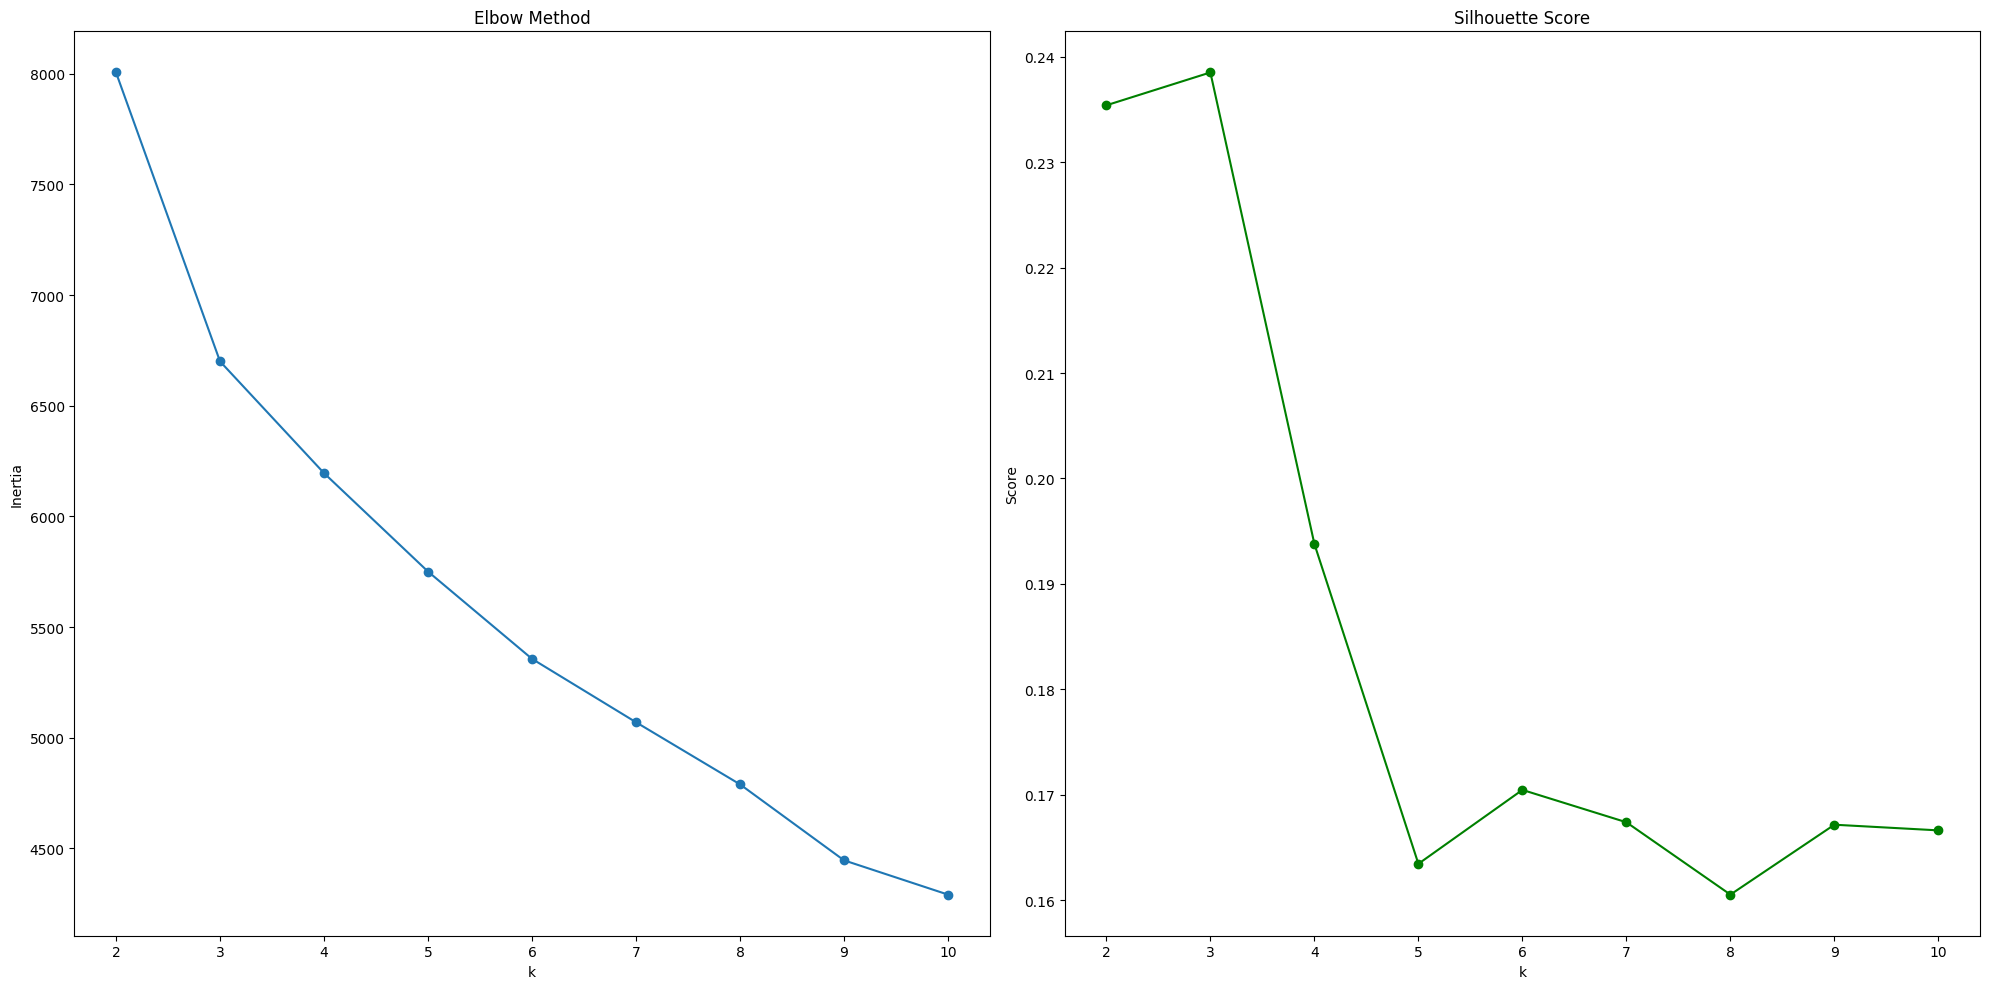

In [60]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))
    
# Plot Elbow
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")

# Plot Silhouette Scores
plt.subplot(1,2,2)
plt.plot(K, silhouette_scores, marker='o', color='green')
plt.title("Silhouette Score")
plt.xlabel("k")
plt.ylabel("Score")
plt.tight_layout()
plt.show()



In [61]:
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

cluster_profile = data.groupby('cluster').mean(numeric_only=True)
print(cluster_profile)

         Unnamed: 0  track_number  acousticness  danceability    energy  \
cluster                                                                   
0        991.971037      7.618902      0.197674      0.569601  0.773759   
1        540.122625     10.214162      0.170796      0.376722  0.919648   
2        919.897260      7.890411      0.534073      0.467500  0.582144   

         liveness  loudness       tempo   valence  popularity  duration_min  
cluster                                                                      
0        0.245666 -7.370785  124.327855  0.769433   21.972561      0.000059  
1        0.832611 -5.482630  133.678929  0.469724   18.126079      0.000079  
2        0.333482 -8.838120  104.167034  0.414181   24.284247      0.000074  


In [62]:
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

cluster_profile = data.groupby('cluster').mean(numeric_only=True)
print(cluster_profile)

          Unnamed: 0  track_number  acousticness  danceability    energy  \
cluster                                                                    
0         987.378571      7.512500      0.181827      0.584307  0.786200   
1         643.740492      8.995526      0.147181      0.367776  0.912477   
2         449.146341     11.654472      0.275528      0.397785  0.854951   
3        1025.182482      7.740876      0.544241      0.506668  0.553215   

         liveness  loudness       tempo   valence  popularity  duration_min  
cluster                                                                      
0        0.239480 -7.265195  120.525577  0.789107   22.467857      0.000060  
1        0.756659 -5.583078  144.650224  0.504198   17.984340      0.000067  
2        0.804992 -6.073829  107.399829  0.419720   19.410569      0.000099  
3        0.256396 -9.241248  112.418307  0.463984   24.102190      0.000066  


In [63]:
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

cluster_profile = data.groupby('cluster').mean(numeric_only=True)
print(cluster_profile)

          Unnamed: 0  track_number  acousticness  danceability    energy  \
cluster                                                                    
0         845.917127      7.649171      0.152376      0.489359  0.863395   
1         489.821023     10.315341      0.167769      0.340892  0.931429   
2         603.593156     10.117871      0.263919      0.432624  0.854943   
3         992.984536      7.298969      0.558838      0.461088  0.526088   
4        1129.356742      7.693820      0.259760      0.640216  0.681812   

         liveness  loudness       tempo   valence  popularity  duration_min  
cluster                                                                      
0        0.309584 -5.969174  140.101895  0.752688   22.911602      0.000062  
1        0.885588 -5.216656  144.072670  0.424983   17.906250      0.000083  
2        0.750905 -6.368932  100.849814  0.498320   18.395437      0.000074  
3        0.234642 -9.361680  111.875412  0.376928   25.886598      0.000078  

---

## Clustering Analysis and Interpretation

### Overview

The goal of clustering is to group songs based on similar musical features to create distinct song cohorts. Below are the interpretations for cluster profiles with **k = 3, 4, 5**, using key features such as:

* `acousticness`
* `danceability`
* `energy`
* `valence`
* `liveness`
* `tempo`
* `popularity`

---

## k = 3 Interpretation

| Cluster | Description                                                                                                                              |
| ------- | ---------------------------------------------------------------------------------------------------------------------------------------- |
| 0       | Moderately danceable and energetic songs. Likely upbeat studio rock songs with high valence and low liveness (likely studio recordings). |
| 1       | High energy, low danceability. Possibly live, high-intensity hard rock performances due to very high liveness.                           |
| 2       | High acousticness and lower energy. These may be acoustic or mellow songs with more emotional tone.                                      |

### Pros:

* Simple and musically meaningful segmentation: electric, acoustic, live.
* Each cluster is clearly distinct in audio character.

---

## k = 4 Interpretation

| Cluster | Description                                                                                           |
| ------- | ----------------------------------------------------------------------------------------------------- |
| 0       | High energy and valence, good danceability. These are feel-good rock songs, likely modern and upbeat. |
| 1       | Very high energy and liveness. Likely live performances or anthems with strong intensity.             |
| 2       | Moderate acousticness and high tempo. Possibly fast acoustic or unplugged sessions.                   |
| 3       | Highest acousticness, lowest energy. A group of mellow, possibly balladic or soft acoustic tracks.    |

### Pros:

* Differentiates both studio vs. live and acoustic vs. electric characteristics.
* Balanced spread in emotional tone (valence).
* More refined separation based on tempo and danceability.

---

## k = 5 Interpretation

| Cluster | Description                                                                                        |
| ------- | -------------------------------------------------------------------------------------------------- |
| 0       | Energetic, balanced tracks. Likely catchy modern-sounding rock.                                    |
| 1       | Very high energy and liveness. Represents intense live rock performances.                          |
| 2       | Mid-tempo, moderately acoustic. Transitional tracks that mix characteristics from multiple styles. |
| 3       | High acousticness and low valence. Likely somber or mellow acoustic tracks.                        |
| 4       | High danceability and valence. Likely feel-good, upbeat and rhythmically engaging songs.           |

### Pros:

* Provides fine-grained musical distinctions.
* Captures nuanced variations in mood and form (live/acoustic/electric).

### Cons:

* Possible over-segmentation. May result in clusters that are too similar or not easily distinguishable in practice.

---

## Recommendation: Use k = 4

| Reason             | Explanation                                                                                     |
| ------------------ | ----------------------------------------------------------------------------------------------- |
| Interpretability   | Clusters are musically intuitive and distinct.                                                  |
| Balance            | Avoids being too coarse (like k=3) or too fragmented (like k=5).                                |
| Feature Separation | Danceability, energy, acousticness, liveness, and valence all help define each cluster clearly. |

---


Visualizing Clusters

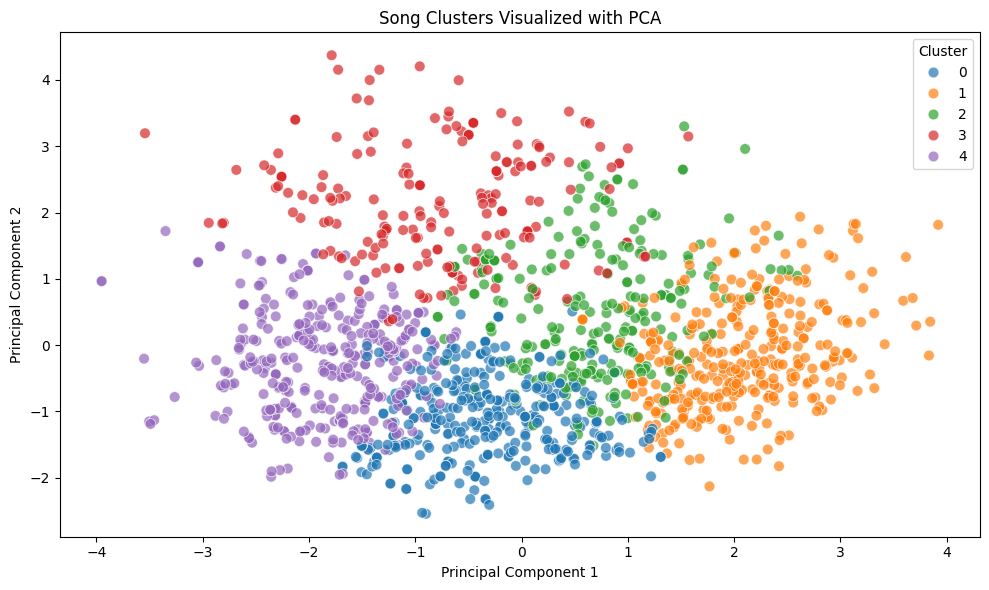

In [64]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Add PCA results to DataFrame
data['PCA1'] = pca_components[:, 0]
data['PCA2'] = pca_components[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', 
    hue='cluster', 
    palette='tab10',
    data=data,
    s=60, alpha=0.7
)
plt.title("Song Clusters Visualized with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

t-SNE visualization

t-SNE (t-distributed Stochastic Neighbor Embedding) is a powerful machine learning algorithm for **visualizing high-dimensional data** in a lower-dimensional space (usually 2D or 3D), while preserving the structure and relationships between data points as much as possible.

---

### 🧠 Core Idea

t-SNE transforms complex, high-dimensional data into a map where **similar points stay close together** and **dissimilar ones are far apart**—making it easier to **visualize clusters and patterns**.

---

### 📊 How It Works (Step-by-Step)

1. **Pairwise Similarities in High-Dimensional Space:**

   * For every pair of data points, t-SNE calculates a **similarity score** (a probability) based on how close they are.
   * Uses a **Gaussian distribution** to compute these similarities.

2. **Pairwise Similarities in Low-Dimensional Space:**

   * It then places the points in 2D or 3D space.
   * Similarities between these low-dimensional points are computed using a **Student's t-distribution** (this helps spread out points better and handle crowding).

3. **Minimize the Difference (KL Divergence):**

   * t-SNE tries to **match the similarity distributions** between high and low dimensions by minimizing a statistical difference called **Kullback-Leibler (KL) divergence**.
   * This is done using gradient descent.

---

### ⚙️ Key Parameters

* **Perplexity**: Controls the balance between local and global structure. Typical values: 5–50.
* **Learning rate**: Affects the speed and quality of convergence.
* **Iterations**: Number of optimization steps. More = better (usually).

---

### ✅ When to Use t-SNE

* Visualizing high-dimensional data like:

  * Word embeddings (e.g., Word2Vec)
  * Image features
  * Genomics data
  * Any clustered or structured data

---

### ⚠️ Limitations

* **Not deterministic**: Can give different results on different runs.
* **Doesn't preserve global distances well**.
* **Computationally intensive** for large datasets.
* Not great for embedding *new* points into an existing map (non-parametric).

---

### 📌 In Summary

| t-SNE is good for...      | But not good for...                     |
| ------------------------- | --------------------------------------- |
| Cluster visualization     | General dimensionality reduction        |
| Detecting local structure | Interpreting distances between clusters |
| Exploratory data analysis | Modeling relationships numerically      |

---


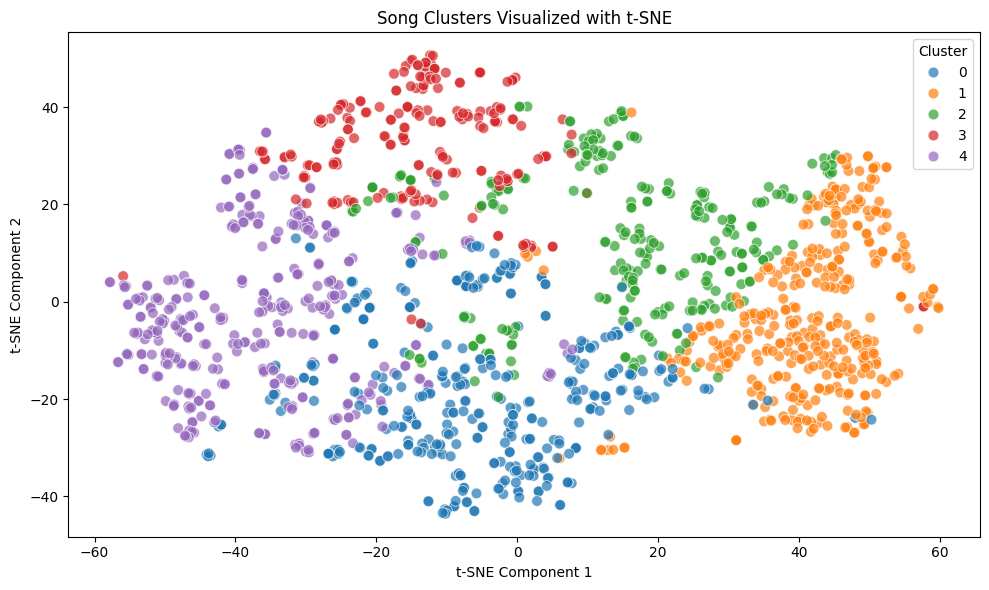

In [65]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_components = tsne.fit_transform(scaled_features)

# Add to DataFrame
data['TSNE1'] = tsne_components[:, 0]
data['TSNE2'] = tsne_components[:, 1]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='TSNE1', y='TSNE2',
    hue='cluster',
    palette='tab10',
    data=data,
    s=60, alpha=0.7
)
plt.title("Song Clusters Visualized with t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()